# Plot the comparison between dv/v and cumulative strain

We plot the figures for the Gaussian-weighted axial strain along the rotation angle and the sensitivity of dv/v to strain.

2023.7.13 Kurama Okubo


In [1]:
import datetime
import os

import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import numpy as np
import pandas as pd
import h5py
import glob
import matplotlib as mpl
import pickle
import matplotlib.dates as dates
import seaborn as sns
from scipy import stats

import shutil
from tqdm import tqdm

from MCMC_func import * # use computing the model dv/v
import seaborn as sns 

os.environ['TZ'] = 'GMT' # change time zone to avoid confusion in unix_tvec conversion

plt.rcParams["font.family"] = 'Arial'
# plt.rcParams["font.sans-serif"] = "DejaVu Sans, Arial, Helvetica, Lucida Grande, Verdana, Geneva, Lucid, Avant Garde, sans-serif"
plt.rcParams["font.size"] = 12
plt.rcParams["xtick.direction"] = "in"
plt.rcParams["xtick.major.size"] = 4.75
plt.rcParams["xtick.major.width"] = 0.75
plt.rcParams["xtick.minor.size"] = 3
plt.rcParams["xtick.minor.width"] = 0.4
plt.rcParams["xtick.minor.visible"] = True

plt.rcParams["ytick.direction"] = "in"
plt.rcParams["ytick.major.size"] = 4.75
plt.rcParams["ytick.major.width"] = 0.75
plt.rcParams["ytick.minor.size"] = 3
plt.rcParams["ytick.minor.width"] = 0.4
plt.rcParams["ytick.minor.visible"] = True

plt.rcParams["savefig.transparent"] = True

plt.rcParams['axes.linewidth'] = 0.75

In [2]:
output_imgdir = "../figure/straindvv_comparison_master"
output_datadir = "../data"

if not os.path.exists(output_imgdir):
    os.makedirs(output_imgdir)
    
if not os.path.exists(output_datadir):
    os.makedirs(output_datadir)

# 1. Plot sensitivity of dv/v to the dilation and max shear

In [3]:
# dvv and strain comparison
df_dvvstrain_all = pd.read_csv("../data/comparison_dvv_strain_all.csv", index_col=0)

# sensitivity data
df_linregress_all = pd.read_csv("../data/sensitivity_linearregression_useallstation.csv", index_col=0)

In [4]:
stationlist = np.unique(df_dvvstrain_all["station"])

In [5]:
# convert dvvmethod mwcs to uppercase
df_dvvstrain_all.loc[df_dvvstrain_all["dvvmethod"]=="mwcs", "dvvmethod"] = "MWCS"
df_linregress_all.loc[df_linregress_all["dvvmethod"]=="mwcs", "dvvmethod"] = "MWCS"

In [6]:
df_dvvstrain_all

,dvvmethod,t,station,dvv,dilation,maxshear,E0,E5,E10,E15,...,E135,E140,E145,E150,E155,E160,E165,E170,E175,E180
0,stretching,2009-01-09,CCRB,-0.062233,-0.012396,0.108474,-0.021220,-0.017167,-0.012780,-0.008194,...,-0.028225,-0.030499,-0.032034,-0.032785,-0.032728,-0.031864,-0.030221,-0.027848,-0.024817,-0.021220
0,stretching,2009-04-09,CCRB,0.006027,-0.046978,0.322582,0.128871,0.116221,0.099326,0.078700,...,0.036029,0.061582,0.084550,0.104235,0.120040,0.131483,0.138218,0.140039,0.136892,0.128871
0,stretching,2010-01-04,CCRB,0.043405,0.138528,0.929938,0.686700,0.660037,0.615423,0.554215,...,0.168792,0.274497,0.373966,0.464176,0.542387,0.606223,0.653743,0.683505,0.694603,0.686700
0,stretching,2010-04-04,CCRB,NaN,0.142533,0.946208,0.844888,0.797056,0.727172,0.637358,...,0.279036,0.410217,0.531100,0.638011,0.727701,0.797447,0.845127,0.869294,0.869214,0.844888
0,stretching,2010-10-01,CCRB,-0.004792,0.442912,1.407029,1.313365,1.272114,1.198939,1.096064,...,0.363481,0.550932,0.728371,0.890408,1.032119,1.149199,1.238090,1.296090,1.321439,1.313365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,MWCS,2018-05-22,VCAB,NaN,1.297152,5.384271,5.143297,4.848885,4.426849,3.890011,...,1.950791,2.711508,3.409543,4.023688,4.535282,4.928780,5.192226,5.317616,5.301140,5.143297
0,MWCS,2019-02-16,VCAB,0.213481,1.366287,5.767805,5.476843,5.152356,4.692075,4.109984,...,2.132393,2.942793,3.684534,4.335080,4.874663,5.286890,5.559234,5.683420,5.655675,5.476843
0,MWCS,2019-05-17,VCAB,NaN,1.452667,5.923226,5.664871,5.342357,4.879588,4.290624,...,2.151549,2.987465,3.754678,4.429875,4.992543,5.425584,5.715840,5.854493,5.837330,5.664871
0,MWCS,2019-08-15,VCAB,0.069851,1.447006,6.395531,5.856034,5.562164,5.121274,4.546760,...,1.966793,2.839159,3.647242,4.366489,4.975045,5.454421,5.790050,5.971735,5.993954,5.856034


In [7]:
df_linregress_all

,dvvmethod,station,dilation_slope,dilation_intercept,dilation_stderr,maxshear_slope,maxshear_intercept,maxshear_stderr,E0_slope,E0_intercept,...,E165_stderr_inv,E170_slope_inv,E170_intercept_inv,E170_stderr_inv,E175_slope_inv,E175_intercept_inv,E175_stderr_inv,E180_slope_inv,E180_intercept_inv,E180_stderr_inv
0,stretching,['CCRB' 'EADB' 'LCCB' 'MMNB' 'SCYB' 'SMNB' 'VC...,249.790530,0.000245,41.330998,100.446172,-0.000034,7.242314,103.787205,-0.00002,...,0.000305,0.004363,0.000002,0.000319,0.004411,0.000002,0.000324,0.004333,0.000002,0.000320
0,MWCS,['CCRB' 'EADB' 'LCCB' 'MMNB' 'SCYB' 'SMNB' 'VC...,206.374163,0.000182,41.255929,65.211193,0.000022,8.560107,67.839542,0.00003,...,0.000377,0.003030,0.000003,0.000395,0.003054,0.000003,0.000401,0.002992,0.000003,0.000395


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


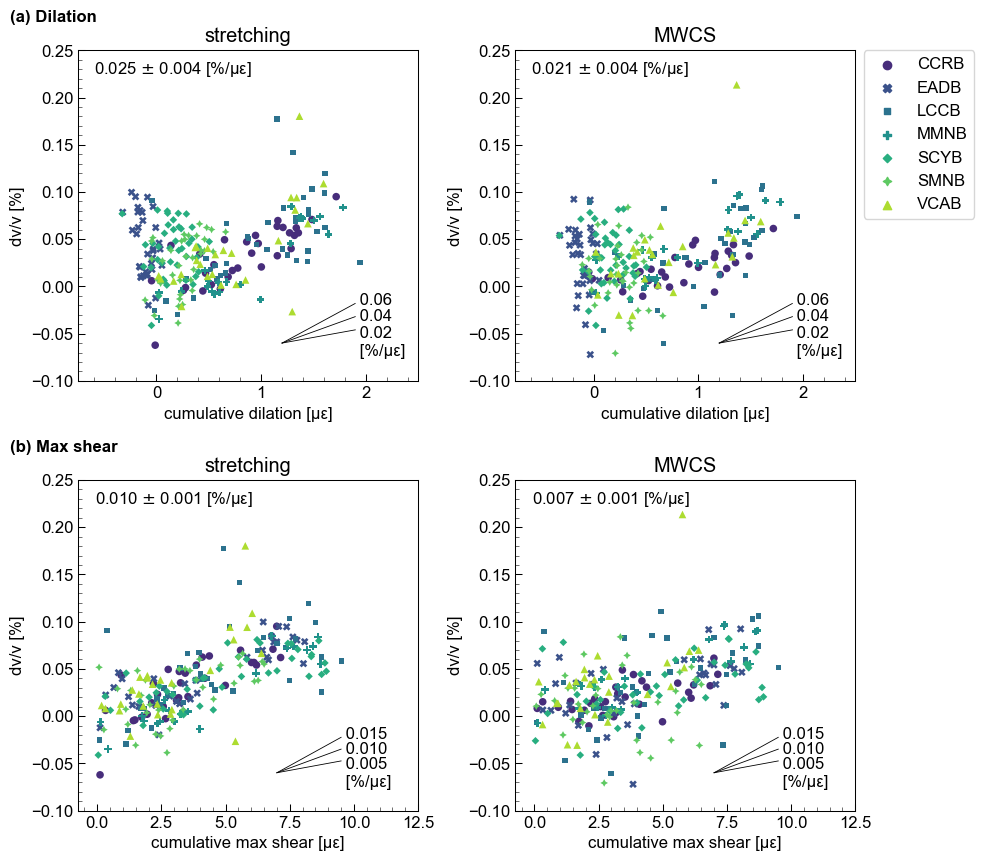

In [8]:
cpalette_scatter="viridis"
ms = 30
hue_order = stationlist

xlimit_dilation = [-0.75, 2.5] #[µε]
xlimit_maxshear = [-0.75, 12.5] #[µε]
ylimit = [-0.1, 0.25] #[µε]

fig, axs = plt.subplots(2, 2, figsize=(10, 8.6), sharex=False, sharey=False)

for i in range(2):
    for j in range(2):
        
        ax = axs[j, i]

        if i==0:
            dvvmethod="stretching"

        else:
            dvvmethod="MWCS"
            
        df_linregress_method = df_linregress_all[df_linregress_all["dvvmethod"] == dvvmethod]

        if j==0:
            key_x = "dilation"
            text_x = -0.6
            slope_mean = df_linregress_method["dilation_slope"].values[0] * 1e-4 
            slope_std = df_linregress_method["dilation_stderr"].values[0] * 1e-4 
            ax.set_xlim(xlimit_dilation)
            ax.set_xlabel("cumulative dilation [µε]")
            ax.set_title(dvvmethod)

        else:
            key_x = "maxshear"
            text_x = -0.1
            slope_mean = df_linregress_method["maxshear_slope"].values[0] * 1e-4 
            slope_std = df_linregress_method["maxshear_stderr"].values[0] * 1e-4 
            ax.set_xlim(xlimit_maxshear)
            ax.set_xlabel("cumulative max shear [µε]")
            ax.set_title(dvvmethod)

        df_plotdvvstrain_filt = df_dvvstrain_all[df_dvvstrain_all["dvvmethod"]==dvvmethod]
        
        sns.scatterplot(x=key_x, y="dvv", data=df_plotdvvstrain_filt, hue="station", style="station", hue_order=hue_order,
                        palette=cpalette_scatter, s=ms, edgecolor="None", linewidth=0.5, ax=ax)
        # update: annotate the text of mean and std for the slope with seven stations
        ax.text(text_x, 0.225, f"{slope_mean:.3f} $\pm$ {slope_std:.3f} [%/µε]")
        ax.set_ylim(ylimit)
        ax.set_ylabel("dv/v [%]")
        
# plt.setp(axs, xlabel=None)
for i in range(2):
    for j in range(2):
#         axs[i, j].grid(True, which='major', axis='y')
#         axs[i, j].set_axisbelow(True)
#         axs[i, j].legend(handles[:0], labels[:0])
        if i==0 and j==1:
            continue
        else:
            axs[i,j].get_legend().remove()
    
sns.move_legend(axs[0,1], "upper left", bbox_to_anchor=(1, 1.025), title="")
# sns.despine()
# axs.set(axs, xlabel=None)

#---plot reference slope---#
ref_dilation = [2e-2, 4e-2, 6e-2]
ref_maxshear= [0.5e-2, 1e-2, 1.5e-2]
refox_dilation = 1.2
refox_maxshear = 7
refoy_dilation = -0.06
refoy_maxshear = -0.06

ref_len_dilation=0.7
ref_len_maxshear=2.5

textdilation_yadjust = [0.004, 0, 0.003]
textshear_yadjust = [0.004, 0, 0.003]

for i in range(2):
    for j in range(2):
        ax = axs[j, i]

        if j==0:
            # for dilation
            for k in range(len(ref_dilation)):
                th0 = np.arctan2(ref_dilation[k], 1)
#                 print(th0)
                xref, yref = [ref_len_dilation*np.cos(th0)+refox_dilation, ref_len_dilation*np.sin(th0)+refoy_dilation]
                ax.plot([refox_dilation, xref], [refoy_dilation, yref], "k-", lw=0.6)
                if k==0:
                    ax.text(xref, yref+textdilation_yadjust[k], f" {ref_dilation[k]:.2f}\n [%/µε]", ha="left", va="top")
                else:
                    ax.text(xref, yref+textdilation_yadjust[k], f" {ref_dilation[k]:.2f}", ha="left", va="center")
                
        else:
            # for max shear
            for k in range(len(ref_maxshear)):
                th0 = np.arctan2(ref_maxshear[k], 1)
                xref, yref = [ref_len_maxshear*np.cos(th0)+refox_maxshear, ref_len_maxshear*np.sin(th0)+refoy_maxshear]
                ax.plot([refox_maxshear, xref], [refoy_maxshear, yref], "k-", lw=0.6)
                if k==0:
                    ax.text(xref, yref+textshear_yadjust[k], f" {ref_maxshear[k]:.3f}\n [%/µε]", ha="left", va="top")
                else:
                    ax.text(xref, yref+textshear_yadjust[k], f" {ref_maxshear[k]:.3f}", ha="left", va="center")

                    
fig.tight_layout()
plt.subplots_adjust(hspace=0.3)

plt.text(-0.2, 1.1, '(a) Dilation', horizontalalignment='left', verticalalignment='center', transform = axs[0,0].transAxes, fontsize=12, fontweight="bold")
plt.text(-0.2, 1.1, '(b) Max shear', horizontalalignment='left', verticalalignment='center', transform = axs[1,0].transAxes, fontsize=12, fontweight="bold")

# foname = (output_imgdir+"/dvv_strain_comparison_dilationandmaxshear.png")
foname = (output_imgdir+"/dvv_strain_comparison_dilationandmaxshear.eps")
plt.savefig(foname, dpi=300, bbox_inches='tight')
        

In [9]:
slope_mean

0.006521119272862348

# 2. Azimuthal axial strain

In [10]:
# Read rotated axial strain
df_straintimeseries_all = pd.read_csv("../data/BP_strain_timeseries_rotatedaxialstrain.csv", index_col=0)

In [11]:
# Parse the rotated angles
rotation_angles = []
for column in df_straintimeseries_all.columns:
    if column.split("_")[-1][0] == "E":
        rotation_angles.append(float(column.split("_")[-1].split("E")[-1]))

In [12]:
df_strain_snapdatelist = df_straintimeseries_all.loc[:, ["year", "doy"]].drop_duplicates().sort_values(by=["year", "doy"])
len(df_strain_snapdatelist)

51

In [13]:
# # search the number of station at snapshot
# for i, row in df_strain_snapdatelist.iterrows():
#     Nstation = len(df_straintimeseries_all[(df_straintimeseries_all["year"]==row.year) & (df_straintimeseries_all["doy"]==row.doy)])
#     print(row.year, row.doy, Nstation)

In [14]:
# Set the time snap to plot the cumulative strain along the rotation azimuth
snapyear = 2019
snapdoy = 317
snapdate = datetime.datetime(snapyear, 1, 1) + datetime.timedelta(snapdoy - 1)
print(f"snap datetime at {snapdate}")

angleshift = 90 # shift 90 degrees to plot from west to east

df_snap = df_straintimeseries_all[(df_straintimeseries_all["year"]==snapyear) & (df_straintimeseries_all["doy"]==snapdoy)]

df_rotatedstrain_azimuth = pd.DataFrame(columns=["year", "doy", "azimuth", "BPstation", "E"])

for i, row in df_snap.iterrows():
    BP_stid = row["BPstation"]
    
    for angle in rotation_angles:
        E = row[f"waverage_E{int(angle):d}"]
        data=dict(year=[snapyear], doy=[snapdoy], azimuth=[-angle+angleshift], BPstation=[BP_stid], E=[E]) # see the note below for the angle
        df_rotatedstrain_azimuth = pd.concat([df_rotatedstrain_azimuth,  pd.DataFrame.from_dict(data)])

snap datetime at 2019-11-13 00:00:00


**NOTE:** The angle is flipped such that 0 degree corresponds to the east (righthand of x axis) and 180 degree to west (lefthand of x axis).
Then, we shift 90 degrees to show the azimuth from north.

In [15]:
# Remove the station
for remove_st in ["FROB", "GHIB", "JCNB", "JCSB", "RMNB", "VARB"]:
    df_rotatedstrain_azimuth = df_rotatedstrain_azimuth[df_rotatedstrain_azimuth["BPstation"] != remove_st]

stationlist= np.unique(df_rotatedstrain_azimuth["BPstation"])
stationlist

array(['CCRB', 'EADB', 'LCCB', 'MMNB', 'SCYB', 'SMNB', 'VCAB'],
      dtype=object)

In [16]:
lc = sns.color_palette("colorblind", as_cmap=True)
sns.color_palette("colorblind")

[(0.00392156862745098, 0.45098039215686275, 0.6980392156862745),
 (0.8705882352941177, 0.5607843137254902, 0.0196078431372549),
 (0.00784313725490196, 0.6196078431372549, 0.45098039215686275),
 (0.8352941176470589, 0.3686274509803922, 0.0),
 (0.8, 0.47058823529411764, 0.7372549019607844),
 (0.792156862745098, 0.5686274509803921, 0.3803921568627451),
 (0.984313725490196, 0.6862745098039216, 0.8941176470588236),
 (0.5803921568627451, 0.5803921568627451, 0.5803921568627451),
 (0.9254901960784314, 0.8823529411764706, 0.2),
 (0.33725490196078434, 0.7058823529411765, 0.9137254901960784)]

In [17]:
df_rotatedstrain_azimuth.head()

,year,doy,azimuth,BPstation,E
0,2019,317,90.0,CCRB,7.105399
0,2019,317,85.0,CCRB,6.762912
0,2019,317,80.0,CCRB,6.241027
0,2019,317,75.0,CCRB,5.555599
0,2019,317,70.0,CCRB,4.727456


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


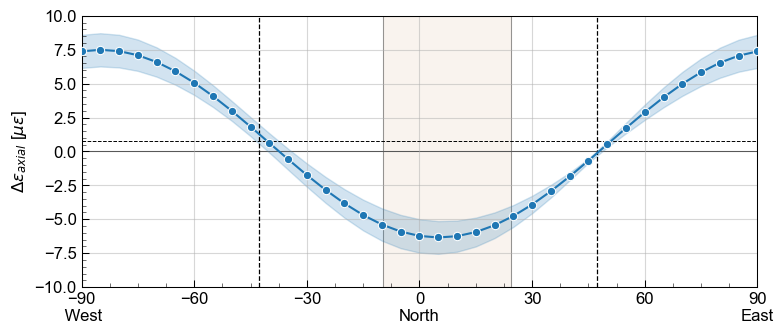

In [18]:
fig, ax = plt.subplots(1,1, figsize=(8, 3.5))

# Plot axial strain along the rotated azimuth
p1 = sns.lineplot(data=df_rotatedstrain_azimuth, x="azimuth", y="E", errorbar='sd', c=sns.color_palette()[0], err_style="band", marker='o', zorder=10)

# ax.axhline(0, c="k", zorder=-3, lw=0.5, ls="-")
ax.grid(axis="both", zorder=-2, alpha=0.5)

# Plot reference angles

azimuth_SAF = -42.7

# plot SHmax range from 0.8-2.2km shown by Hickman and Zoback (2004)
SHmax_min = azimuth_SAF + 50 -17 
SHmax_max = azimuth_SAF + 50 +17 

ax.axvline(azimuth_SAF, c="k", ls="--", lw=0.9, label="SAF parallel") # fault parallel
ax.axvline(azimuth_SAF+90, c="k", ls="--", lw=0.9, label="SAF normal") # fault normal
# ax.axvline(angle_SAF-angleshift-50, c="r", ls="-.", label="SHmax") # SHmax Hickman and Zoback (2004)

ax.axvline(SHmax_min, c="k", ls="-", lw=0.5, alpha=0.5, label=None, zorder=-5)
ax.axvline(SHmax_max, c="k", ls="-", lw=0.5, alpha=0.5, label=None, zorder=-5)
ax.fill_betweenx([-10, 10], SHmax_min, SHmax_max, fc=lc[5], alpha=0.1, edgecolor="k", zorder=-5)

# plot zero line
ax.axhline(0, ls="-", c="k", lw=0.75, zorder=-5)

# plot mean of axial strain (i.e. dilation)
ax.axhline(df_rotatedstrain_azimuth["E"].mean(), ls="--", c="k", lw=0.7)

# plot station list
textstr = "Station list\n"+'\n'.join((stationlist))
props = dict(boxstyle='round', pad=0.5, lw=0.5, facecolor='white', alpha=1)

# place a text box in upper left in axes coords
# ax.text(1.03, 0.27, textstr, transform=ax.transAxes, fontsize=11,
#         va='center', ha='left', bbox=props)


ax.set_xlabel("")
ax.set_ylabel(r"$\Delta\varepsilon_{{axial}}$ [$\mu \varepsilon$]")

ax.set_xticks(np.linspace(-90, 90, 7))
ax.set_xlim([-90, 90])
ax.set_ylim([-10, 10])
# ax.legend()
ax.text(-90, -12.5, " West", fontsize=12, ha="center")
ax.text(90, -12.5, "East", fontsize=12, ha="center")
ax.text(0, -12.5, "North", fontsize=12, ha="center")
plt.tight_layout()
foname = output_imgdir+f"/rotated_axialstrain.eps"
# foname = output_imgdir+f"/rotated_axialstrain.png"
plt.savefig(foname, dpi=300, bbox_inches='tight')

**NOTE:**

$$\dfrac{1}{\pi}\int_0^{\pi} \varepsilon_{ax} ({\theta}) d\theta $$
$$ = \dfrac{1}{N} \sum_i^N \varepsilon_{ax} ({\theta}_i) $$
$$ = \dfrac{1}{2} (\varepsilon_{11} + \varepsilon_{22}). $$

where $\Delta \theta = \pi/N$. Thus, the mean value of axial strain indicates half of first strain invariant.

In [19]:
# check the dilation and mean of strain
df_dvvstrain_all
# mean of axial strain
mean_eax = df_rotatedstrain_azimuth["E"].mean()

# mean of dilation
df_snap = df_dvvstrain_all[(df_dvvstrain_all["dvvmethod"]=="stretching") & (pd.to_datetime(df_dvvstrain_all["t"])==snapdate)]

print(f'mean of axial strain:{mean_eax:.2f}, half of mean of dilation:{0.5*df_snap["dilation"].mean():.2f}')
print("The difference of them is likely to be the discretization error of the azimuth.")

mean of axial strain:0.76, half of mean of dilation:0.57
The difference of them is likely to be the discretization error of the azimuth.


In [20]:
# search the negative range of azimuthal strain
xazimuth = p1.get_lines()[0].get_xdata()
mean_azst = p1.get_lines()[0].get_ydata()
x_compressive = xazimuth[np.where(mean_azst < 0)[0]]
print(f"Azimuthal strain is compressive from {x_compressive[0]} to {x_compressive[-1]} degrees")

Azimuthal strain is compressive from -35.0 to 45.0 degrees


In [21]:
df_snap

,dvvmethod,t,station,dvv,dilation,maxshear,E0,E5,E10,E15,...,E135,E140,E145,E150,E155,E160,E165,E170,E175,E180
0,stretching,2019-11-13,CCRB,0.095054,1.717224,6.992462,7.105399,6.762912,6.241027,5.555599,...,2.284390,3.347473,4.334932,5.216766,5.966179,6.560401,6.981377,7.216316,7.258080,7.105399
0,stretching,2019-11-13,EADB,0.078746,-0.177725,8.080667,6.526119,6.267729,5.816197,5.185242,...,0.820412,1.955278,3.028033,4.006083,4.859710,5.562978,6.094517,6.438177,6.583516,6.526119
0,stretching,2019-11-13,LCCB,0.025478,1.943392,8.727177,8.836618,8.436859,7.810275,6.975904,...,2.585724,3.926933,5.178348,6.301946,7.263588,8.034053,8.589932,8.914335,8.997405,8.836618
0,stretching,2019-11-13,MMNB,0.083561,1.783210,8.608721,8.375919,7.993833,7.395949,6.600434,...,2.437159,3.713316,4.903736,5.972251,6.886392,7.618385,8.145988,8.453170,8.530598,8.375919
0,stretching,2019-11-13,SCYB,0.047437,0.504325,8.924416,8.627458,8.326448,7.780104,7.005027,...,1.252871,2.692023,4.057041,5.306449,6.402286,7.311254,8.005736,8.464629,8.673990,8.627458
0,stretching,2019-11-13,SMNB,0.057686,0.660893,6.428283,6.218249,5.968132,5.546717,4.966808,...,1.255698,2.264048,3.213646,4.075639,4.823837,5.435506,5.892059,6.179626,6.289469,6.218249
0,stretching,2019-11-13,VCAB,0.108884,1.596502,6.036383,5.936539,5.621707,5.160316,4.566386,...,2.161757,3.033297,3.836925,4.548226,5.145585,5.610853,5.929892,6.093009,6.095247,5.936539


In [22]:
df_dvvstrain_all[df_dvvstrain_all["dvvmethod"]=="stretching"]["dilation"]

0   -0.012396
0   -0.046978
0    0.138528
0    0.142533
0    0.442912
       ...   
0    1.297152
0    1.366287
0    1.452667
0    1.447006
0    1.596502
Name: dilation, Length: 241, dtype: float64

In [23]:
df_dvvstrain_all

,dvvmethod,t,station,dvv,dilation,maxshear,E0,E5,E10,E15,...,E135,E140,E145,E150,E155,E160,E165,E170,E175,E180
0,stretching,2009-01-09,CCRB,-0.062233,-0.012396,0.108474,-0.021220,-0.017167,-0.012780,-0.008194,...,-0.028225,-0.030499,-0.032034,-0.032785,-0.032728,-0.031864,-0.030221,-0.027848,-0.024817,-0.021220
0,stretching,2009-04-09,CCRB,0.006027,-0.046978,0.322582,0.128871,0.116221,0.099326,0.078700,...,0.036029,0.061582,0.084550,0.104235,0.120040,0.131483,0.138218,0.140039,0.136892,0.128871
0,stretching,2010-01-04,CCRB,0.043405,0.138528,0.929938,0.686700,0.660037,0.615423,0.554215,...,0.168792,0.274497,0.373966,0.464176,0.542387,0.606223,0.653743,0.683505,0.694603,0.686700
0,stretching,2010-04-04,CCRB,NaN,0.142533,0.946208,0.844888,0.797056,0.727172,0.637358,...,0.279036,0.410217,0.531100,0.638011,0.727701,0.797447,0.845127,0.869294,0.869214,0.844888
0,stretching,2010-10-01,CCRB,-0.004792,0.442912,1.407029,1.313365,1.272114,1.198939,1.096064,...,0.363481,0.550932,0.728371,0.890408,1.032119,1.149199,1.238090,1.296090,1.321439,1.313365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,MWCS,2018-05-22,VCAB,NaN,1.297152,5.384271,5.143297,4.848885,4.426849,3.890011,...,1.950791,2.711508,3.409543,4.023688,4.535282,4.928780,5.192226,5.317616,5.301140,5.143297
0,MWCS,2019-02-16,VCAB,0.213481,1.366287,5.767805,5.476843,5.152356,4.692075,4.109984,...,2.132393,2.942793,3.684534,4.335080,4.874663,5.286890,5.559234,5.683420,5.655675,5.476843
0,MWCS,2019-05-17,VCAB,NaN,1.452667,5.923226,5.664871,5.342357,4.879588,4.290624,...,2.151549,2.987465,3.754678,4.429875,4.992543,5.425584,5.715840,5.854493,5.837330,5.664871
0,MWCS,2019-08-15,VCAB,0.069851,1.447006,6.395531,5.856034,5.562164,5.121274,4.546760,...,1.966793,2.839159,3.647242,4.366489,4.975045,5.454421,5.790050,5.971735,5.993954,5.856034


# 3. Plot azimuthal sensitivity


In [24]:
df_linregress_all

,dvvmethod,station,dilation_slope,dilation_intercept,dilation_stderr,maxshear_slope,maxshear_intercept,maxshear_stderr,E0_slope,E0_intercept,...,E165_stderr_inv,E170_slope_inv,E170_intercept_inv,E170_stderr_inv,E175_slope_inv,E175_intercept_inv,E175_stderr_inv,E180_slope_inv,E180_intercept_inv,E180_stderr_inv
0,stretching,['CCRB' 'EADB' 'LCCB' 'MMNB' 'SCYB' 'SMNB' 'VC...,249.790530,0.000245,41.330998,100.446172,-0.000034,7.242314,103.787205,-0.00002,...,0.000305,0.004363,0.000002,0.000319,0.004411,0.000002,0.000324,0.004333,0.000002,0.000320
0,MWCS,['CCRB' 'EADB' 'LCCB' 'MMNB' 'SCYB' 'SMNB' 'VC...,206.374163,0.000182,41.255929,65.211193,0.000022,8.560107,67.839542,0.00003,...,0.000377,0.003030,0.000003,0.000395,0.003054,0.000003,0.000401,0.002992,0.000003,0.000395


In [25]:
# pivot the dataframe
df_plot_azimuthsensitivity = pd.DataFrame(columns=["dvvmethod", "azimuth", "E_slope", "E_stderr"])

for dvvmethod in ["stretching", "MWCS"]:
    df_linregress_method = df_linregress_all[df_linregress_all["dvvmethod"]==dvvmethod]
    for angle in rotation_angles:
        E_slope = df_linregress_method[f"E{int(angle):d}_slope"].values[0] * 1e-4 
        E_stderr = df_linregress_method[f"E{int(angle):d}_stderr"].values[0] * 1e-4 
        
        data=dict(dvvmethod=[dvvmethod], azimuth=[-angle+angleshift], E_slope=[E_slope], E_stderr=[E_stderr]) 
        df_plot_azimuthsensitivity = pd.concat([df_plot_azimuthsensitivity,  pd.DataFrame.from_dict(data)])


In [26]:
df_plot_azimuthsensitivity

,dvvmethod,azimuth,E_slope,E_stderr
0,stretching,90.0,0.010379,0.000765
0,stretching,85.0,0.010817,0.000802
0,stretching,80.0,0.011637,0.000868
0,stretching,75.0,0.012990,0.000976
0,stretching,70.0,0.015179,0.001152
...,...,...,...,...
0,MWCS,-70.0,0.007811,0.001000
0,MWCS,-75.0,0.007201,0.000930
0,MWCS,-80.0,0.006855,0.000892
0,MWCS,-85.0,0.006722,0.000882


In [27]:
sns.color_palette("colorblind")

[(0.00392156862745098, 0.45098039215686275, 0.6980392156862745),
 (0.8705882352941177, 0.5607843137254902, 0.0196078431372549),
 (0.00784313725490196, 0.6196078431372549, 0.45098039215686275),
 (0.8352941176470589, 0.3686274509803922, 0.0),
 (0.8, 0.47058823529411764, 0.7372549019607844),
 (0.792156862745098, 0.5686274509803921, 0.3803921568627451),
 (0.984313725490196, 0.6862745098039216, 0.8941176470588236),
 (0.5803921568627451, 0.5803921568627451, 0.5803921568627451),
 (0.9254901960784314, 0.8823529411764706, 0.2),
 (0.33725490196078434, 0.7058823529411765, 0.9137254901960784)]

In [28]:
cpalette=[sns.color_palette("colorblind")[3], sns.color_palette("colorblind")[0]]
cpalette

[(0.8352941176470589, 0.3686274509803922, 0.0),
 (0.00392156862745098, 0.45098039215686275, 0.6980392156862745)]

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


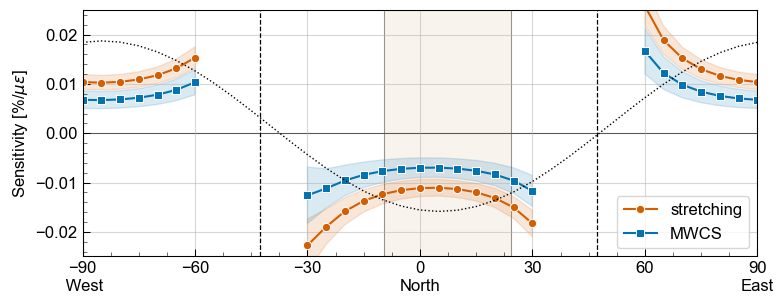

In [34]:
fig, ax = plt.subplots(1,1, figsize=(8, 3.2))
ax.grid(axis="both", zorder=-2, alpha=0.5)

markers = ["o", "s"]

mask_limit = 0.02
mask_limit_band = 0.03
mask_angle = [30, 60]

# to compute 95 confidence interval
# ref: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html
# Two-sided inverse Students t-distribution
# p - probability, df - degrees of freedom
tinv = lambda p, df: abs(stats.t.ppf(p/2, df))

for i, dvvmethod in enumerate(["stretching", "MWCS"]):
    
    # compute the number of degree of freedom
    df_dvvstrain_method= df_dvvstrain_all[(df_dvvstrain_all["dvvmethod"]==dvvmethod)]
    mask = ~np.isnan(df_dvvstrain_method.dilation) & ~np.isnan(df_dvvstrain_method.dvv)
    Ndof = len(df_dvvstrain_method[mask]) # number of data used to compute the slope
    ts = tinv(0.05, Ndof-2) # dof is minus by 2 as we have two parameters; slope and intersection
        
    df_plot_sens_method = df_plot_azimuthsensitivity[df_plot_azimuthsensitivity["dvvmethod"]==dvvmethod]
     
    maskind = np.where( (np.abs(df_plot_sens_method["azimuth"]) > mask_angle[0]) & (np.abs(df_plot_sens_method["azimuth"]) < mask_angle[1]))[0]
    xazi = df_plot_sens_method["azimuth"]
    eslope = df_plot_sens_method["E_slope"].values
    eslope[maskind] = np.nan
    
    ax.plot(xazi, eslope, "-", marker=markers[i], c=cpalette[i], label=dvvmethod,
                            markeredgecolor="w", markeredgewidth=0.75)
    
    # standard error band
    y1 = df_plot_sens_method["E_slope"].values - df_plot_sens_method["E_stderr"].values * ts
    y2 = df_plot_sens_method["E_slope"].values + df_plot_sens_method["E_stderr"].values * ts
    
    y1[maskind] = np.nan
    y2[maskind] = np.nan
    
    ax.fill_between(xazi, y1, y2, color=cpalette[i], alpha=0.15)

ax.set_xlabel("")
ax.set_ylabel(r"Sensitivity [%/$\mu \varepsilon$]")

ax.set_xticks(np.linspace(-90, 90, 7))
ax.set_xlim([-90, 90])
ax.set_ylim([-0.025, 0.025])

# Plot reference angles

azimuth_SAF = -42.7

# plot SHmax range from 0.8-2.2km shown by Hickman and Zoback (2004)
SHmax_min = azimuth_SAF + 50 -17 
SHmax_max = azimuth_SAF + 50 +17 

ax.axvline(azimuth_SAF, c="k", ls="--", lw=0.9, label=None) # fault parallel
ax.axvline(azimuth_SAF+90, c="k", ls="--", lw=0.9, label=None) # fault normal
# ax.axvline(angle_SAF-angleshift-50, c="r", ls="-.", label="SHmax") # SHmax Hickman and Zoback (2004)

ax.axvline(SHmax_min, c="k", ls="-", lw=0.5, alpha=0.5, label=None, zorder=-5)
ax.axvline(SHmax_max, c="k", ls="-", lw=0.5, alpha=0.5, label=None, zorder=-5)
ax.fill_betweenx([-0.025, 0.025], SHmax_min, SHmax_max, fc=lc[5], alpha=0.1, edgecolor="k", zorder=-5)

# plot zero line
ax.axhline(0, ls="-", c="k", lw=0.75, zorder=-5)

# plot mean of axial strain (i.e. dilation)
ax.axhline(df_rotatedstrain_azimuth["E"].mean(), ls="--", c="k", lw=0.7)

# plot station list
textstr = "Station list\n"+'\n'.join((stationlist))
props = dict(boxstyle='round', pad=0.5, lw=0.5, facecolor='white', alpha=1)

# # place a text box in upper left in axes coords
# ax.text(1.03, 0.27, textstr, transform=ax.transAxes, fontsize=11,
#         va='center', ha='left', bbox=props)

# # plot second axis to plot the strain
ax2 = ax.twinx()

p2 = sns.lineplot(data=df_rotatedstrain_azimuth, x="azimuth", y="E", errorbar='sd', ls=":", lw=1,
                  c="k", err_style=None, marker=None, zorder=-10, ax=ax2)
ax2.set_yticks([])
ax2.set_xlabel("")
ax2.set_ylabel("")
ax2.set_ylim([-10, 10])

ax.legend(loc=4)
ax.text(-90, -0.032, " West", fontsize=12, ha="center")
ax.text(90, -0.032, "East", fontsize=12, ha="center")
ax.text(0, -0.032, "North", fontsize=12, ha="center")

plt.tight_layout()
# foname = output_imgdir+f"/sensitivity_withrotation.png"
foname = output_imgdir+f"/sensitivity_withrotation.eps"
plt.savefig(foname, dpi=300, bbox_inches='tight')



# 4. Scatter plot of dvv and axial strain near SHmax

In [30]:
SHmax_angle_id = 17
plotcomp = f"E{rotation_angles[SHmax_angle_id]:.0f}"
print(f"plot angle at {rotation_angles[SHmax_angle_id]}, {plotcomp}")

plot angle at 85.0, E85


In [31]:
df_linregress_all

,dvvmethod,station,dilation_slope,dilation_intercept,dilation_stderr,maxshear_slope,maxshear_intercept,maxshear_stderr,E0_slope,E0_intercept,...,E165_stderr_inv,E170_slope_inv,E170_intercept_inv,E170_stderr_inv,E175_slope_inv,E175_intercept_inv,E175_stderr_inv,E180_slope_inv,E180_intercept_inv,E180_stderr_inv
0,stretching,['CCRB' 'EADB' 'LCCB' 'MMNB' 'SCYB' 'SMNB' 'VC...,249.790530,0.000245,41.330998,100.446172,-0.000034,7.242314,103.787205,-0.00002,...,0.000305,0.004363,0.000002,0.000319,0.004411,0.000002,0.000324,0.004333,0.000002,0.000320
0,MWCS,['CCRB' 'EADB' 'LCCB' 'MMNB' 'SCYB' 'SMNB' 'VC...,206.374163,0.000182,41.255929,65.211193,0.000022,8.560107,67.839542,0.00003,...,0.000377,0.003030,0.000003,0.000395,0.003054,0.000003,0.000401,0.002992,0.000003,0.000395


In [32]:
df_dvvstrain_all

,dvvmethod,t,station,dvv,dilation,maxshear,E0,E5,E10,E15,...,E135,E140,E145,E150,E155,E160,E165,E170,E175,E180
0,stretching,2009-01-09,CCRB,-0.062233,-0.012396,0.108474,-0.021220,-0.017167,-0.012780,-0.008194,...,-0.028225,-0.030499,-0.032034,-0.032785,-0.032728,-0.031864,-0.030221,-0.027848,-0.024817,-0.021220
0,stretching,2009-04-09,CCRB,0.006027,-0.046978,0.322582,0.128871,0.116221,0.099326,0.078700,...,0.036029,0.061582,0.084550,0.104235,0.120040,0.131483,0.138218,0.140039,0.136892,0.128871
0,stretching,2010-01-04,CCRB,0.043405,0.138528,0.929938,0.686700,0.660037,0.615423,0.554215,...,0.168792,0.274497,0.373966,0.464176,0.542387,0.606223,0.653743,0.683505,0.694603,0.686700
0,stretching,2010-04-04,CCRB,NaN,0.142533,0.946208,0.844888,0.797056,0.727172,0.637358,...,0.279036,0.410217,0.531100,0.638011,0.727701,0.797447,0.845127,0.869294,0.869214,0.844888
0,stretching,2010-10-01,CCRB,-0.004792,0.442912,1.407029,1.313365,1.272114,1.198939,1.096064,...,0.363481,0.550932,0.728371,0.890408,1.032119,1.149199,1.238090,1.296090,1.321439,1.313365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,MWCS,2018-05-22,VCAB,NaN,1.297152,5.384271,5.143297,4.848885,4.426849,3.890011,...,1.950791,2.711508,3.409543,4.023688,4.535282,4.928780,5.192226,5.317616,5.301140,5.143297
0,MWCS,2019-02-16,VCAB,0.213481,1.366287,5.767805,5.476843,5.152356,4.692075,4.109984,...,2.132393,2.942793,3.684534,4.335080,4.874663,5.286890,5.559234,5.683420,5.655675,5.476843
0,MWCS,2019-05-17,VCAB,NaN,1.452667,5.923226,5.664871,5.342357,4.879588,4.290624,...,2.151549,2.987465,3.754678,4.429875,4.992543,5.425584,5.715840,5.854493,5.837330,5.664871
0,MWCS,2019-08-15,VCAB,0.069851,1.447006,6.395531,5.856034,5.562164,5.121274,4.546760,...,1.966793,2.839159,3.647242,4.366489,4.975045,5.454421,5.790050,5.971735,5.993954,5.856034


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


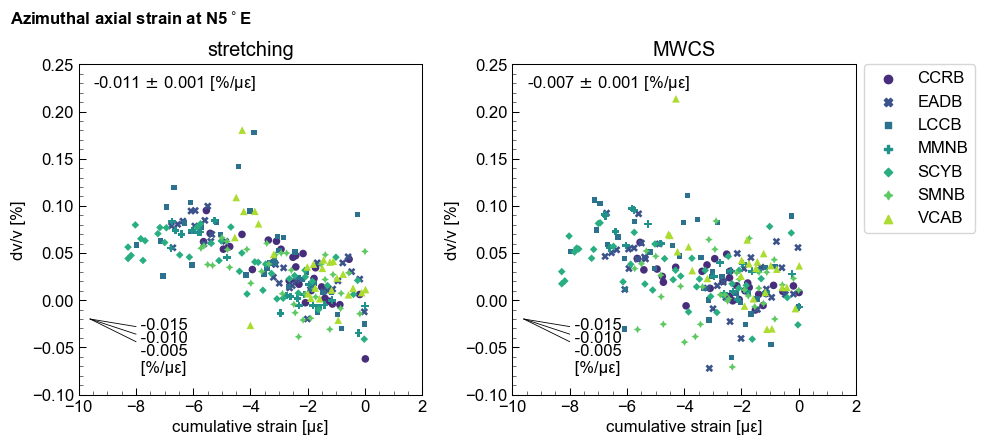

In [33]:
cpalette_scatter="viridis"
ms = 30
hue_order = stationlist

xlimit_SHmax = [-10, 2] #[µε]
ylimit = [-0.1, 0.25] #[µε]

fig, axs = plt.subplots(1, 2, figsize=(10, 4.3), sharex=False, sharey=False)

for i in range(2):
        
    ax = axs[i]

    if i==0:
        dvvmethod="stretching"

    else:
        dvvmethod="MWCS"

    df_linregress_method = df_linregress_all[df_linregress_all["dvvmethod"] == dvvmethod]

    key_x = plotcomp
    text_x = -9.5
    slope_mean = df_linregress_method[f"{plotcomp}_slope"].values[0] * 1e-4 
    slope_std = df_linregress_method[f"{plotcomp}_stderr"].values[0] * 1e-4 
    ax.set_xlim(xlimit_SHmax)
    ax.set_xlabel("cumulative strain [µε]")

    df_plotdvvstrain_filt = df_dvvstrain_all[df_dvvstrain_all["dvvmethod"]==dvvmethod]

    sns.scatterplot(x=key_x, y="dvv", data=df_plotdvvstrain_filt, hue="station", style="station", hue_order=hue_order,
                    palette=cpalette_scatter, s=ms, edgecolor="None", linewidth=0.5, ax=ax)
    # update: annotate the text of mean and std for the slope with seven stations
    ax.text(text_x, 0.225, f"{slope_mean:.3f} $\pm$ {slope_std:.3f} [%/µε]")
    ax.set_ylim(ylimit)
    ax.set_ylabel("dv/v [%]")
    ax.set_title(dvvmethod)

# plt.setp(axs, xlabel=None)
for i in range(2):
#         axs[i, j].grid(True, which='major', axis='y')
#         axs[i, j].set_axisbelow(True)
#         axs[i, j].legend(handles[:0], labels[:0])
    if i==1:
        continue
    else:
        axs[i].get_legend().remove()

sns.move_legend(axs[1], "upper left", bbox_to_anchor=(1, 1.025), title="")
# sns.despine()
# axs.set(axs, xlabel=None)

# #---plot reference slope---#
slopeorientation = -1 # negative slope
ref_SHmax = [0.5e-2, 1e-2, 1.5e-2]
refox_SHmax = -9.6
refoy_SHmax = -0.02
ref_len_SHmax=1.6
textSHmax_yadjust = [-0.018, -0.004, 0.018]

for i in range(2):
    ax = axs[i]

    for k in range(len(ref_dilation)):
        th0 = slopeorientation * np.arctan2(ref_SHmax[k], 1)
#                 print(th0)
        xref, yref = [ref_len_SHmax*np.cos(th0)+refox_SHmax, ref_len_SHmax*np.sin(th0)+refoy_SHmax]
        ax.plot([refox_SHmax, xref], [refoy_SHmax, yref], "k-", lw=0.6)
        if k==0:
            ax.text(xref, yref+textSHmax_yadjust[k], f" -{ref_SHmax[k]:.3f}\n [%/µε]", ha="left", va="top")
        else:
            ax.text(xref, yref+textSHmax_yadjust[k], f" -{ref_SHmax[k]:.3f}", ha="left", va="center")

                            
fig.tight_layout()
plt.subplots_adjust(hspace=0.3)

plt.text(-0.2, 1.14, f'Azimuthal axial strain at N{90-rotation_angles[SHmax_angle_id]:.0f}$^\circ$E', horizontalalignment='left', verticalalignment='center', transform = axs[0].transAxes, fontsize=12, fontweight="bold")
# plt.text(-0.2, 1.1, '(b) mwcs', horizontalalignment='left', verticalalignment='center', transform = axs[1,0].transAxes, fontsize=12, fontweight="bold")

# foname = (output_imgdir+f"/dvv_strain_comparison_axialstrain_N{90-rotation_angles[SHmax_angle_id]}E.png")
foname = (output_imgdir+f"/dvv_strain_comparison_axialstrain_N{90-rotation_angles[SHmax_angle_id]}E.eps")
plt.savefig(foname, dpi=300, bbox_inches='tight')
        

# Conclusion

In this notebook we plotted the relashionship between the cumulative dilation, max shear, azimuthal strain components and the dv/v associatwed with the single station auto-correlations.